#Name : Ashutosh Kokate
#College : P.E.S.Modern College of Engineering.
#TASK 3 : Sale Prediction


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

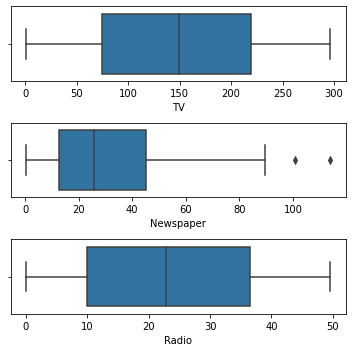

In [10]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

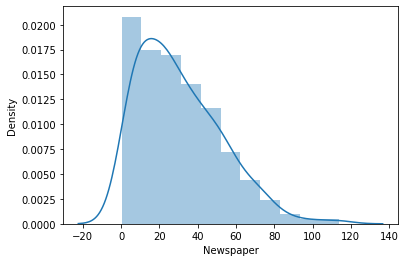

In [11]:
sns.distplot(df['Newspaper'])

In [12]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [13]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [14]:
data = df.copy()

In [15]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

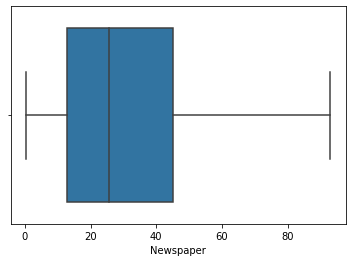

In [16]:
sns.boxplot(data['Newspaper'])

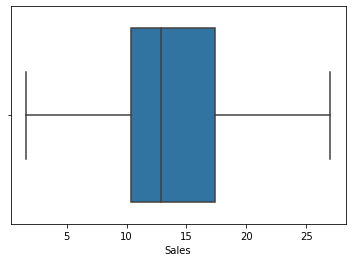

In [17]:
sns.boxplot(data['Sales']);

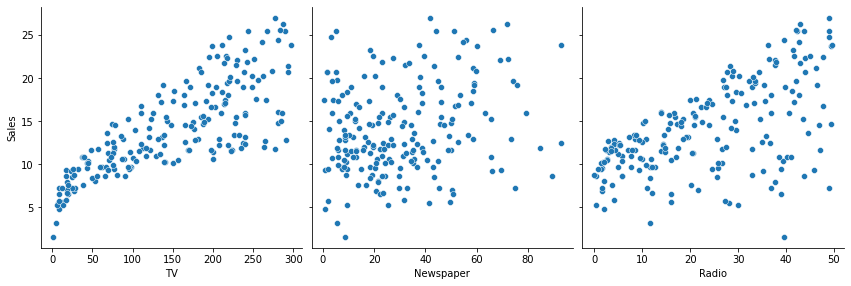

In [18]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

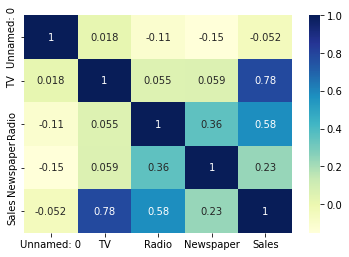

In [19]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [20]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [21]:
print(important_features)

['TV', 'Radio', 'Sales']


In [22]:
X = data['TV']
y = data['Sales']

In [23]:
X = X.values.reshape(-1,1)

In [24]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [26]:
print(X.shape,y.shape)

(200, 1) (200,)


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [28]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [29]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [31]:
knn_train_pred = knn.predict(X_train)

In [32]:
knn_test_pred = knn.predict(X_test)

In [33]:
print(knn_train_pred, knn_test_pred)

[16.74 17.56 13.3  14.66  4.08 13.4  14.66 19.22 17.22  7.74 12.84 21.3
  6.02 22.04 15.1   7.74 14.36 11.28 11.4  11.96 17.26  6.08 14.36 17.14
 18.92 15.3  13.72 17.52 13.4  15.28 15.1  19.32 11.28 21.06 11.96 13.64
  9.56 18.7  12.64 16.64 17.3  17.3  16.12 12.54 11.96 11.28 11.3  13.72
 13.4  15.04 13.42 11.46  9.78 15.78 14.4  14.82 13.72 15.1  13.    7.26
  8.12 14.6  11.28  9.92 16.   14.66  4.08 15.1  15.9  14.36  9.78 11.96
 12.48  8.12 18.78 18.92 18.4   7.26 13.72 19.22 16.14 16.14  8.12  7.26
 15.74 18.78 15.1  21.3  17.3  13.5  11.96 11.3  15.64 18.4   9.78 14.18
  7.26  6.02 11.24 13.72 17.52  6.94 22.04 15.12 10.78 22.04 16.64 13.72
  9.92  9.56 11.98 16.14  7.26 15.9  17.3   7.74 16.   16.64  5.2  14.48
 21.7   9.94 11.28 12.54 13.64 11.3  17.52 17.3  13.72 18.4  14.34 12.54
 10.1   5.2 ] [15.3  14.36 19.32 17.14 12.64 14.6  18.4  13.64 10.1  14.36  8.12 14.48
 10.36 16.12 18.4  15.9  11.   16.02  9.92 22.04 10.78 22.04 13.3  13.64
 11.96 14.68 15.12 17.26 20.5   7.26 1

In [34]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [35]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.45739673969066985
RMSE: 4.1598222572750885


In [36]:
Results.head() 

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.691131,0.457397,4.159822,0.233734


In [37]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [38]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [39]:
print(svr_train_pred,svr_test_pred)

[16.98345931 16.90023923 12.87905933 15.1889242   7.17320104 13.87633696
 17.71270663 17.80399287 16.7368737   8.07891422 13.14105637 17.91084998
  7.31653124 17.20748108 14.18775264  8.0414402  15.24560303 10.72329596
 12.60130085 11.26622789 17.07645846  7.40023904 15.24560303 16.61280023
 17.15859145 14.88135919 16.19070328 17.25624686 13.85096033 14.95541702
 14.103638   17.54703791 10.66409024 17.95886566 11.16251346 13.25106543
  9.39029473 17.83092167 13.80046946 17.76604902 17.93721636 17.95907573
 16.78480942 11.9342906  11.1993374  10.81458638 12.29587033 16.26050826
 13.841468   13.41856148 12.91226589 10.35596145  8.71519387 15.88714827
 17.49696868 15.05177815 12.67856276 14.81655587 13.10013453  7.62167017
  7.88777169 17.57447048 10.76254394  9.74999638 15.98519572 15.16294746
  7.21962276 14.24601775 13.58803509 17.45917846  8.79910633 11.26622789
 13.95955126  7.94785269 17.10414333 17.17772911 17.69868613  7.65894434
 12.78842282 17.83121048 14.67822908 14.68600576  7

In [40]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5579381724202124
RMSE: 3.7546986130157847


In [41]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.691131,0.457397,4.159822,0.233734
1,Support Vector Machine,0.607212,0.557938,3.754699,0.049274


In [42]:
import statsmodels.api as sm

In [43]:
X_train_constant = sm.add_constant(X_train)

In [44]:
model = sm.OLS(y_train, X_train_constant).fit()

In [45]:
model.params

const    7.121364
x1       0.045677
dtype: float64

In [46]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     213.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.44e-29
Time:                        17:03:50   Log-Likelihood:                -339.78
No. Observations:                 134   AIC:                             683.6
Df Residuals:                     132   BIC:                             689.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1214      0.523     13.612      0.0

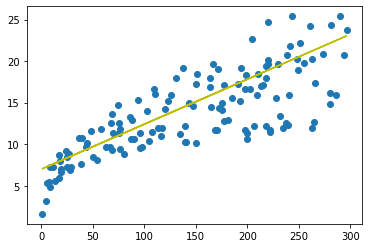

In [47]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [48]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

168    0.139832
74     0.131186
89     4.563312
112   -1.046795
130   -5.553338
         ...   
150   -3.842869
153    4.054183
125   -0.504390
149    0.936878
56    -1.954806
Name: Sales, Length: 134, dtype: float64

In [49]:
y_train_pred

array([16.96016781, 16.86881402, 12.13668751, 15.14679501,  7.15333807,
       13.52983287, 17.96505954, 18.1614702 , 16.69524181,  8.37747891,
       12.47469655, 18.48577617,  7.51875325, 20.65999645, 13.96376338,
        8.34550508, 15.20617498, 10.21825785, 11.81238155, 10.61107916,
       17.06522468,  7.65578394, 15.20617498, 16.5673465 , 17.16114616,
       14.81335367, 16.14711905, 17.27990609, 13.49329135, 14.89557208,
       13.84957114, 20.18495673, 10.17714864, 18.78724369, 10.53342844,
       12.62543031,  9.32755836, 19.6231309 , 13.42020831, 18.0746841 ,
       19.23487727, 19.05673738, 16.7454864 , 11.15463423, 10.56083457,
       10.2822055 , 11.49264327, 16.2156344 , 13.47958828, 12.86295017,
       12.17779672,  9.96703492,  8.8662217 , 15.85021922, 17.60421206,
       15.00062894, 11.89916765, 14.74027063, 12.41988427,  7.9389807 ,
        8.20847439, 17.72297199, 10.24566399,  9.56507822, 15.94614071,
       15.11938887,  7.30863952, 14.04141411, 13.10960541, 17.54

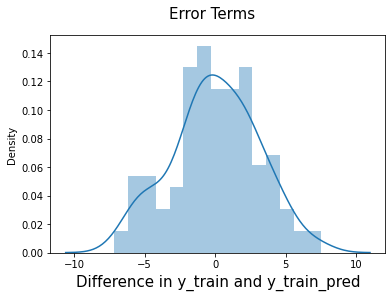

In [50]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

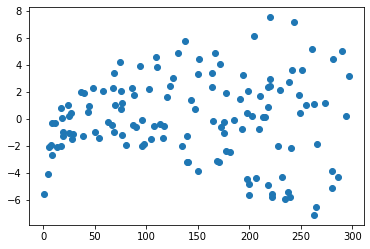

In [51]:
plt.scatter(X_train, res)
plt.show()

In [52]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [53]:
y_pred

array([13.13701155, 17.53569671, 20.107306  , 16.57191419, 13.34255759,
       17.6316182 , 19.76929697, 12.64826876,  9.15398615, 17.4991552 ,
        8.2906928 , 15.4619656 ,  9.84370729, 16.75005409, 19.76016159,
       13.03195469, 11.70732468, 15.70405315,  9.68840584, 20.39963814,
       10.69329757, 20.50012732, 12.13668751, 12.61172724, 10.60651147,
       16.44401888, 15.56702246, 17.02411547, 20.25803976,  8.00749604,
       17.96505954,  8.85708632, 18.07925179, 20.07533218, 10.47404847,
       15.7268916 , 10.14060712,  7.90700687, 14.68545835, 13.48415597,
       17.35298913,  8.56018649, 13.57550976, 11.25055572, 17.43520754,
       16.92819399,  7.50505018,  8.01663142, 10.56996995, 16.87338171,
       11.56115861, 16.04662988, 14.27436628, 18.05184565,  7.71973159,
       18.08838717,  7.47764404, 17.00584471, 18.71416065,  9.0900385 ,
       13.29688069, 10.34615316, 19.312528  , 15.69948546, 16.20649902,
       11.42412792])

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.618043888880565

In [56]:
r2 = r2_score(y_test, y_pred)
r2

0.5895308595283144

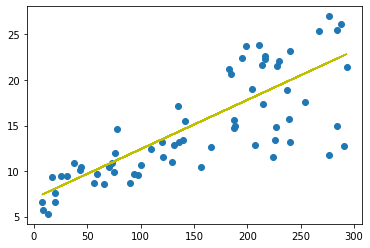

In [57]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()